In [1]:
import os
import math
import random
import re

import pandas as pd
import numpy as np 
import scipy.stats as stats

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import cm
import matplotlib.colors

In [15]:
def generate_max_likelihood_distro(size, num_samples, sample_size, k_range, ax, ax2, ax3, title):
    
    ks_results = []
    for line_i, k in enumerate(k_range): # перебираем степени свободы (количество классов, на которые разбиваются наблюдения)

        data = pd.Series(np.random.choice(k, size, p = [1 / k] * k))                    # не генерируем равномерно распределенный массив групп наблюдений

        max_likelihood = []
        for i in range(num_samples):
            observed = data.sample(sample_size, replace = True).value_counts()          # считаем, сколько раз появилось каждое из значений
            expected = sample_size/k                                                    # ожидаемое число значений
            max_likelihood += [[i, 
                                k - 1, 
                                (((observed - expected)**2)/expected).sum()             # максимальное правдоподобие
                               ]] 

        max_likelihood = pd.DataFrame(max_likelihood, columns = ['Sample #', 'Degrees of freedom', 'Max likelyhood distribution'])
        
        # строим графики распределений
        sns.kdeplot(max_likelihood['Max likelyhood distribution'], label = 'k = {}'.format(k), ax = ax)
        ax.legend(title = 'Степени свободы'), ax.set_ylabel('$f_k(x)$'), ax.set_xlabel('$x$'), ax.set_title(title)
        
        # строим qq-графики
        stats.probplot(max_likelihood['Max likelyhood distribution'], 
                       dist = stats.chi2, sparams = (k - 1), # chi2 с числом степеней свободы k-1
                       plot = ax2, fit = True)
        line_index = (line_i + 1) * 2
        (ax2.get_lines()[line_index - 2].set_color(ax.get_lines()[line_i].get_color()), 
         ax2.get_lines()[line_index - 2].set_label('k = {}'.format(k)), 
         ax2.get_lines()[line_index - 2].set_markersize(3), 
         ax2.get_lines()[line_index - 2].set_alpha(0.5)
        )
        ax2.get_lines()[line_index - 1].set_color('lightgrey'), ax2.get_lines()[line_index - 1].set_linestyle(':')
        ax2.set_title('Соответствие распределению $\chi^2$'), ax2.legend(title = 'Степени свободы')
        
        # проводим КС-тест
        ks_stat, ks_p = stats.kstest(max_likelihood['Max likelyhood distribution'], 'chi2', args = (k - 1, ))
        ks_results.append([k, ks_stat, ks_p])
        ax2.legend_.remove()
        
    ks_results = pd.DataFrame(ks_results, columns = ['k', 'statistic', 'p']).set_index('k')
    ks_results[['p']].plot(ax = ax3, xticks = ks_results.index, label = '$p$-value')
    ax3.axhline(0.05 / len(k_range), color = 'red', linestyle = ':', label = 'alpha = {:.2f}'.format(0.05 / len(k_range))) # с коррекцией Бонферрони
    ax3.set_ylabel('$p$-value'), ax3.set_xlabel('$k$ (степени свободы)'), ax3.set_title('Результаты КС-теста'), ax3.legend()

<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
C:\Users\User\AppData\Local\Temp\ipykernel_31840\3274435371.py:34: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_title('Соответствие распределению $\chi^2$'), ax2.legend(title = 'Степени свободы')


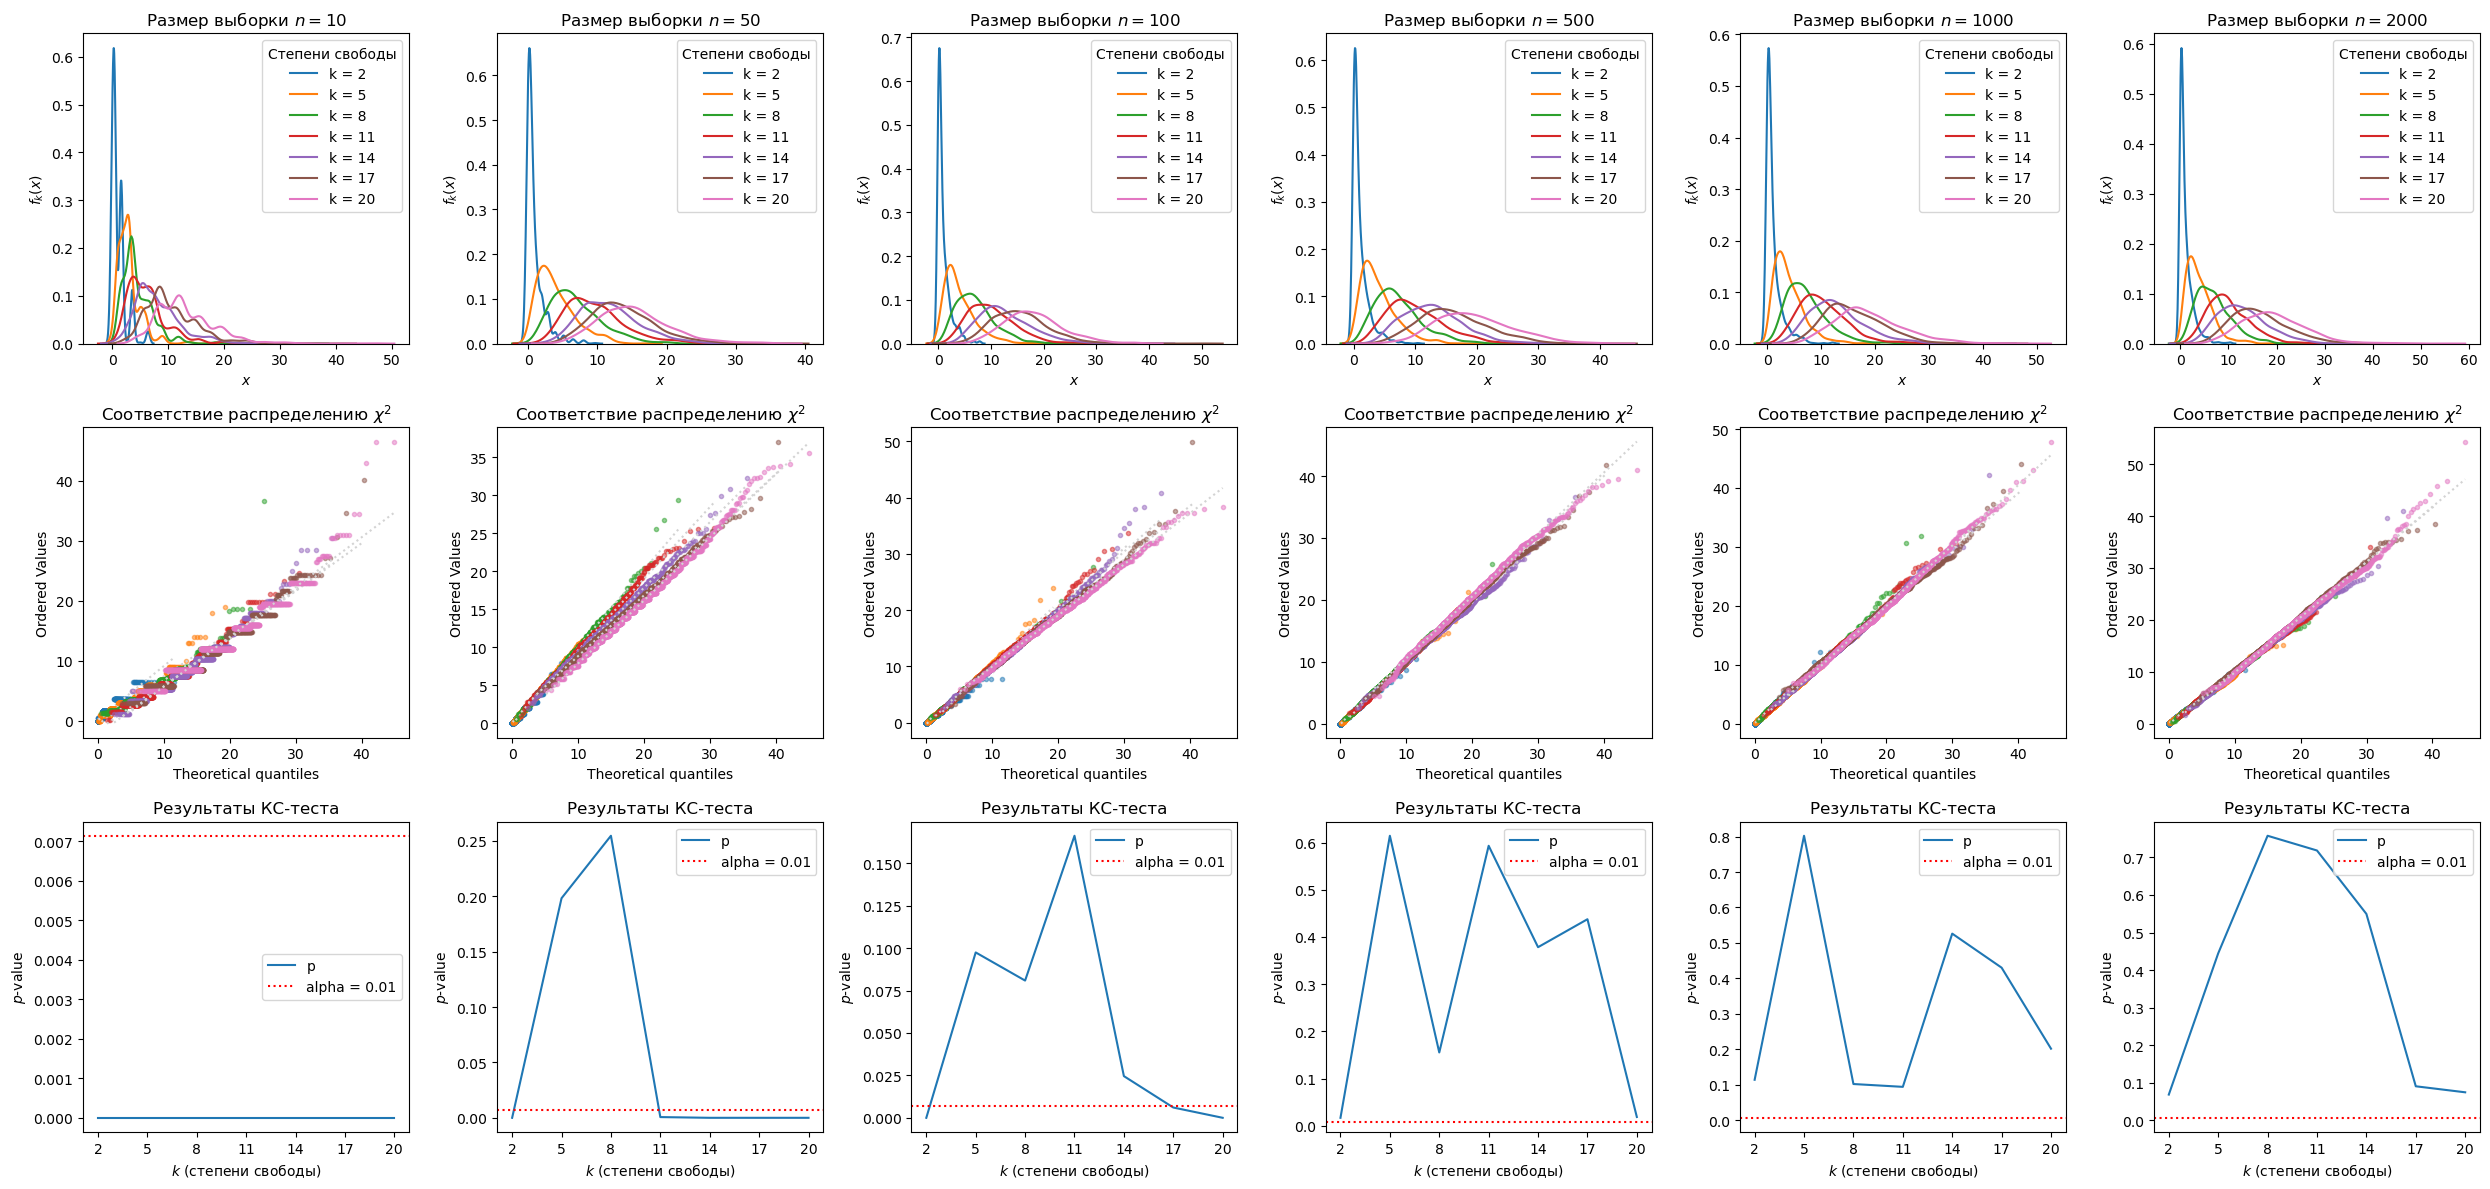

In [16]:
size = 100000             # размер «генеральной совокупности» — исходной большой выборки
num_samples = 1000
sample_size = 100

plt.figure(figsize = (25, 12))
sample_sizes = [10, 50, 100, 500, 1000, 2000]
for i, sample_size in enumerate(sample_sizes):
    generate_max_likelihood_distro(size, num_samples, sample_size,
                                   range(2, 22, 3),
                                   title = 'Размер выборки $n = {}$'.format(sample_size),
                                   ax = plt.subplot(3, len(sample_sizes), i + 1),
                                   ax2 =  plt.subplot(3, len(sample_sizes), len(sample_sizes) + i + 1),
                                   ax3 =  plt.subplot(3, len(sample_sizes), len(sample_sizes) * 2 + i + 1),
                                  )
plt.tight_layout()

In [14]:
b = range(2, 22, 3)
type(b)

range